In [3]:
import geopandas as gpd
import rasterio as rio
from rasterio import mask
import matplotlib.pyplot as plt
import numpy as np



In [4]:
path_sam_water = 'data/Section-7/sample_water.gpkg'
path_sam_land = 'data/Section-7/sample_land.gpkg'
path_rsimg = 'data/Section-7/s2_kunming_chenggong_6bands_20m.tif'


In [7]:
sam_wat = gpd.read_file(path_sam_water)
sam_land = gpd.read_file(path_sam_land)
print(sam_land.shape)
print(sam_wat.shape)



(16, 1)
(13, 1)


In [ ]:
rsimg_rio = rio.open(path_rsimg)
rsimg_rio.meta

{'driver': 'GTiff',
 'dtype': 'uint16',
 'nodata': None,
 'width': 1497,
 'height': 1611,
 'count': 6,
 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 48N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(20.0, 0.0, 268180.0,
        0.0, -20.0, 2765440.0)}

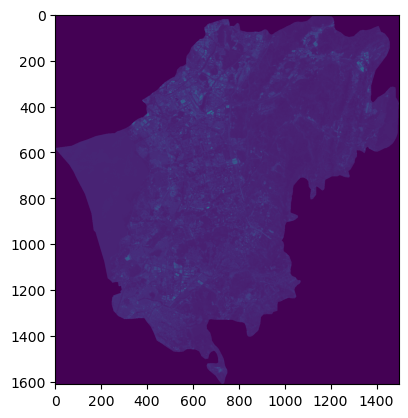

In [ ]:
plt.imshow(rsimg_rio.read(1))

In [11]:
masked_img_wat, transform_masked_img_wat = mask.mask(
     rsimg_rio,
     sam_wat.geometry,
     crop=True,
     nodata=0)

masked_img_land, transform_masked_img_land = mask.mask(
     rsimg_rio,
     sam_land.geometry,
     crop=True,
     nodata=0)


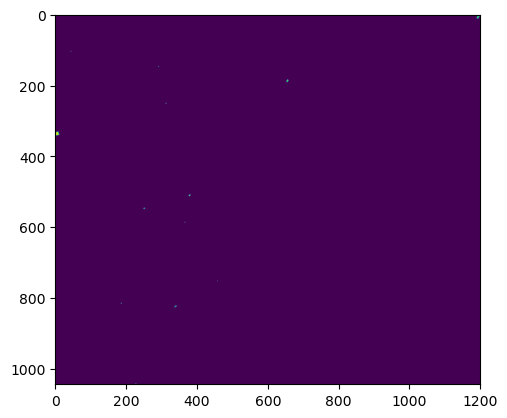

In [ ]:
plt.imshow(masked_img_wat[0])


In [13]:
ids_wat = np.where(masked_img_wat[0] != 0)
fea_wat = masked_img_wat[:, ids_wat[0], ids_wat[1]]
print(fea_wat.shape)


(6, 256)


In [ ]:
ids_land = np.where(masked_img_land[0] != 0)
fea_land = masked_img_wat[:, ids_land[0], ids_land[1]]
print(fea_land.shape)


(6, 224)


In [15]:
feas = np.concatenate([fea_wat, fea_land], axis=1)
feas_ = feas.transpose(1,0)
feas_.shape


(480, 6)

In [16]:
label_wat = np.full(shape=fea_wat.shape[1], fill_value=0)
label_land = np.full(shape=fea_land.shape[1], fill_value=1)


In [25]:
labels = np.concatenate([label_wat, label_land])
labels = labels[:,np.newaxis]
labels.shape


(480, 1)

In [27]:
sams = np.concatenate([feas_, labels], axis=1)
sams.shape
sams

array([[1254, 1260, 1200, ..., 1137, 1126,    0],
       [1258, 1251, 1197, ..., 1121, 1115,    0],
       [1256, 1260, 1189, ..., 1130, 1124,    0],
       ...,
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,    1],
       [   0,    0,    0, ...,    0,    0,    1]])

In [29]:
np.save('data/Section-7/sams_array.npy', sams)
